# K-means 알고리즘을 실습해보쟝

## 필요 패키지 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

## 더미 데이터 생성

In [ ]:
# 1. 무작위 데이터 생성
# 데이터의 중심을 설정
centers = [(2, 2), (8, 8), (-5, -5)]
# 각 군집에 속할 데이터 포인트 생성
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=2, random_state=42)

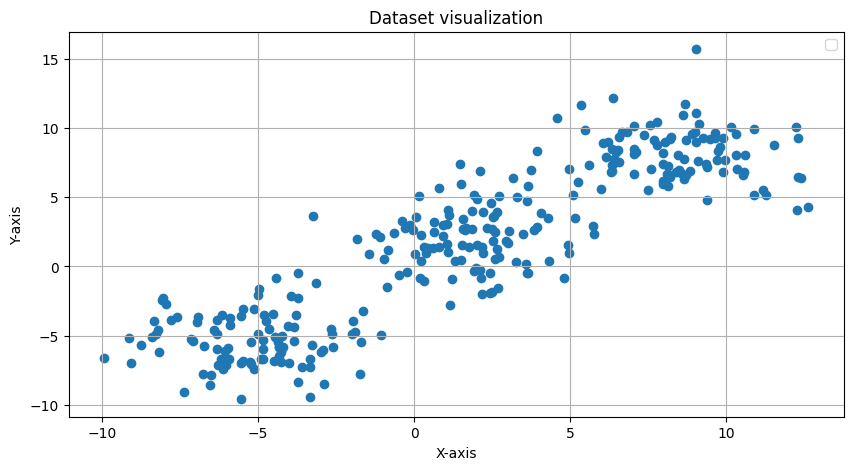

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Dataset visualization')
plt.legend()
plt.grid(True)
plt.show()

## 어떤 군집 개수가 좋을까?
### 실루엣 계수를 먼저 살펴보자.
- 군집 내의 데이터 포인트의 “응집도”를 나타내는 값으로서, 군집 내 모든 데이터 포인트와 군집 중심 사이의 거리를 제곱한 값들의 합
- 이를 위해 inertia 값을 계산하며, 군집 중심과 군집 내 데이터 포인트의 거리 제곱으로 계산된다.

In [ ]:
# 2. K-means 알고리즘으로 적절한 수의 k를 선택해 군집화 진행
# K 값을 여러 개 시도하면서 inertia 값을 저장
inertia_values = []
silhouette_avg_values = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    # 실루엣 계수 계산
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_avg_values.append(silhouette_avg)

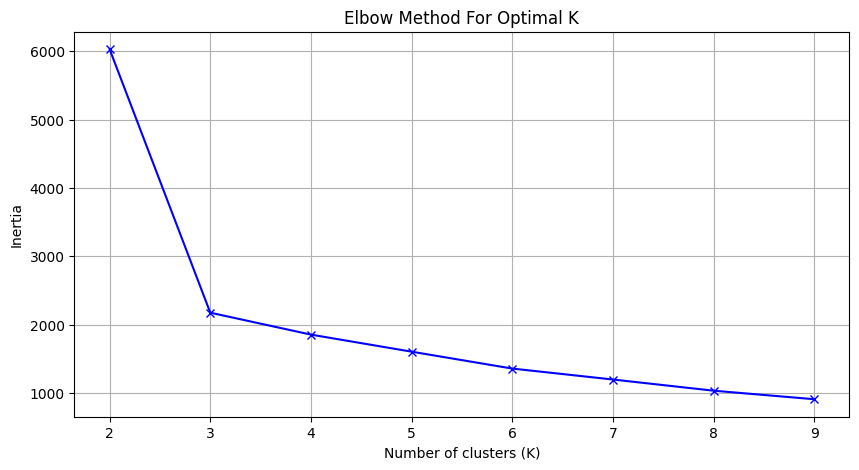

In [ ]:
# 3. Elbow 그래프 생성
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

## K=3이 좋겠군
### 진짜? 실루엣 계수도 살펴보자.
- 개별 데이터 포인트가 1) 자신의 군집과 얼마나 가깝고, 2) 다른 군집과는 얼마나 멀리 떨어져 있는지 측정하는 지표

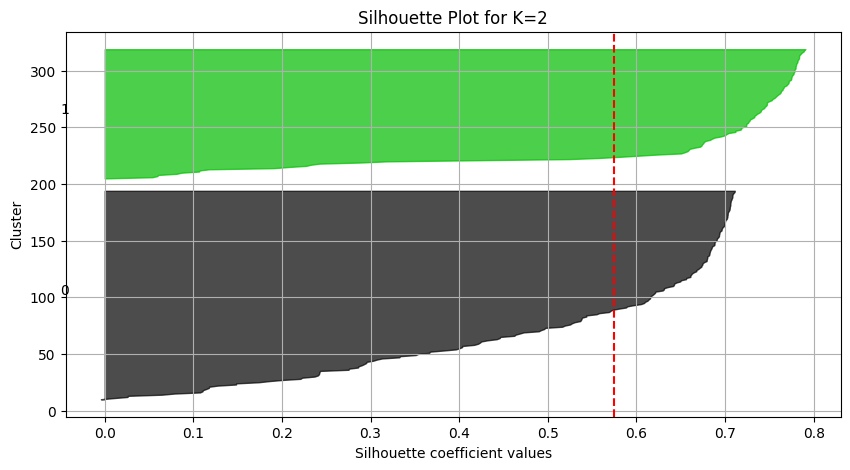

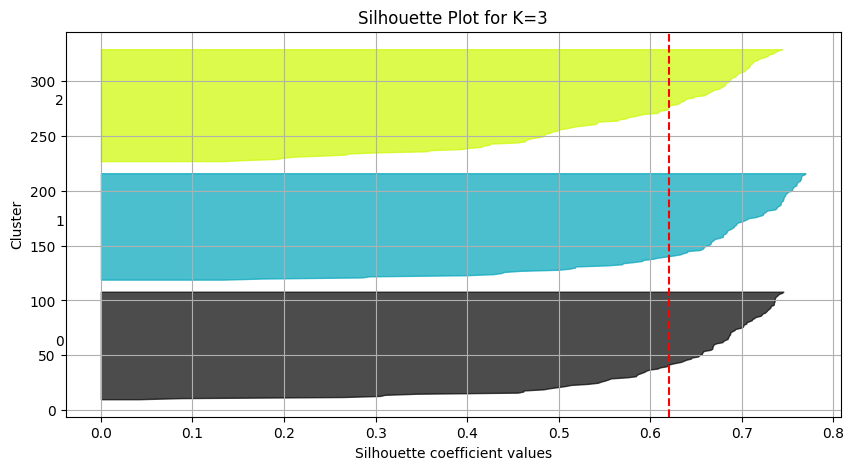

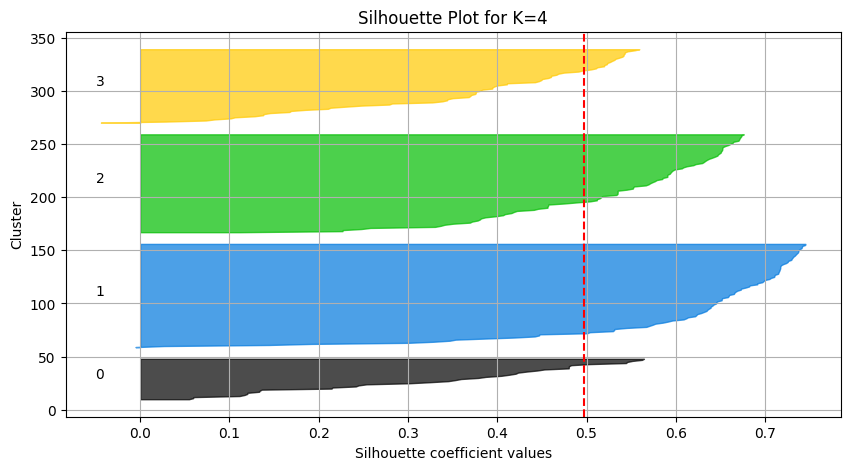

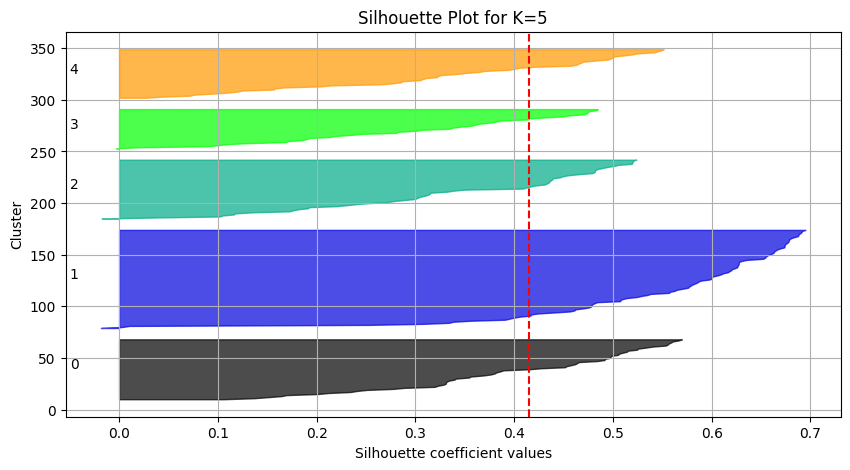

In [ ]:
# 군집 개수가 2~5일 때 실루엣 계수 그래프를 그리는 코드

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    # 실루엣 계수 계산
    silhouette_values = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)

    plt.figure(figsize=(10, 5))
    y_lower = 10
    for i in range(k):
        ith_silhouette_values = silhouette_values[labels == i]
        ith_silhouette_values.sort()

        size_cluster_i = ith_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f'Silhouette Plot for K={k}')
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster")
    plt.grid(True)
    plt.show()

In [ ]:
# 4. K=3으로 군집화 진행 (시각적으로 확인된 Elbow 포인트)
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_optimal.fit_predict(X)

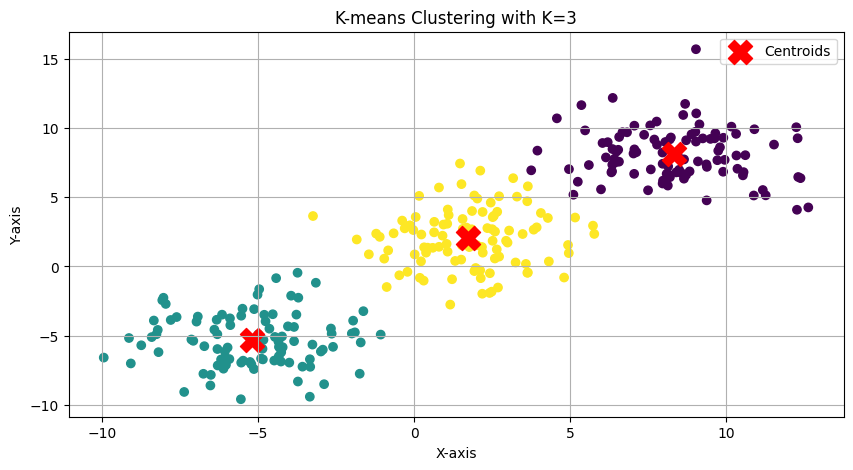

In [ ]:
# 5. 군집화 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering with K={optimal_k}')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

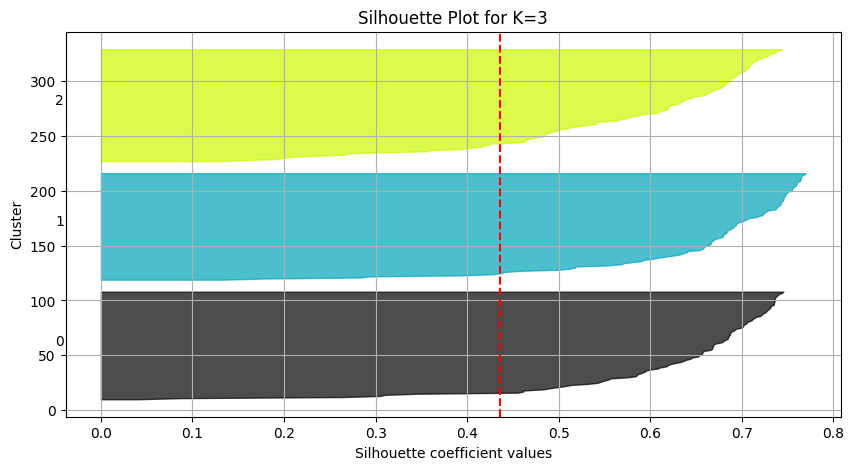

In [ ]:
# 6. 실루엣 계수 계산 및 시각화
silhouette_values = silhouette_samples(X, labels)

plt.figure(figsize=(10, 5))
y_lower = 10
for i in range(optimal_k):
    ith_silhouette_values = silhouette_values[labels == i]
    ith_silhouette_values.sort()

    size_cluster_i = ith_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.axvline(x=np.mean(silhouette_avg_values), color="red", linestyle="--")
plt.title(f'Silhouette Plot for K={optimal_k}')
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.grid(True)
plt.show()

# K-means, 그는 신인가?

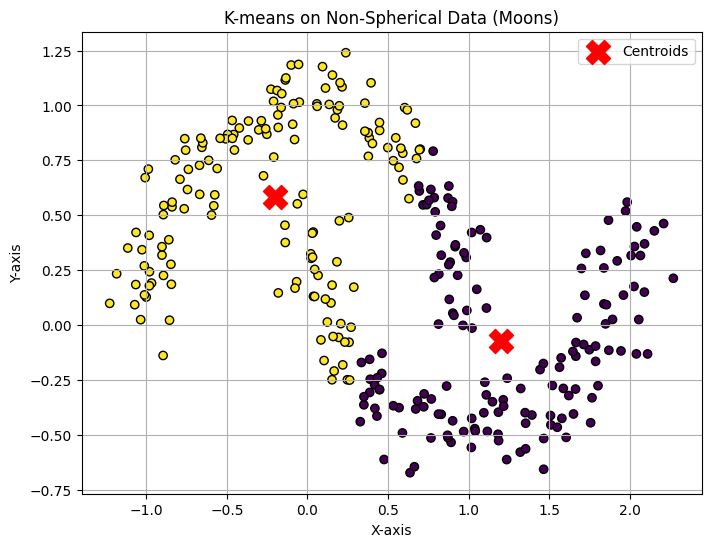

In [ ]:
# 비구형 데이터를 생성하고 K-means 알고리즘을 수행하는 코드
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 비구형 데이터 생성 (두 개의 반달 모양)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. K-means 알고리즘 적용 (K=2로 설정)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_moons = kmeans_moons.fit_predict(X_moons)

# 3. 비구형 데이터에 대한 K-means 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means on Non-Spherical Data (Moons)')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

## 다른 거리 유형으로 하면 안되나요?

In [ ]:
!pip install pyclustering

## 맨하탄 거리

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric

user_function = lambda point1, point2: abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])
metric = distance_metric(type_metric.USER_DEFINED, func=user_function)

# create K-Means algorithm with specific distance metric
start_centers = [[0, 1], [1, 0]];
kmeans_instance = kmeans(X_moons, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [ ]:
X1 = X_moons[clusters[0]]
X2 = X_moons[clusters[1]]

print(len(X1), len(X2))

149 151


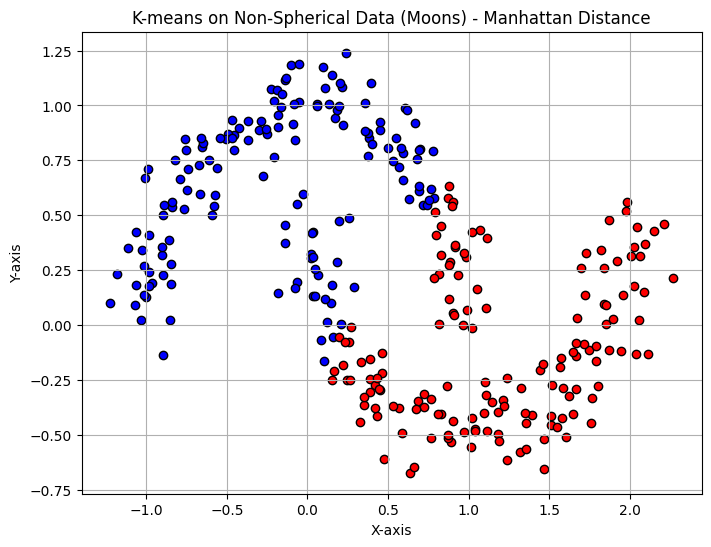

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='blue', marker='o', edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='o', edgecolor='k')
plt.title('K-means on Non-Spherical Data (Moons) - Manhattan Distance')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## x 값의 차이

In [92]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric

user_function = lambda point1, point2: abs(point1[0] - point2[0])
metric = distance_metric(type_metric.USER_DEFINED, func=user_function)

# create K-Means algorithm with specific distance metric
start_centers = [[0, 1], [1, 0]];
kmeans_instance = kmeans(X_moons, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [93]:
X1 = X_moons[clusters[0]]
X2 = X_moons[clusters[1]]

print(len(X1), len(X2))

153 147


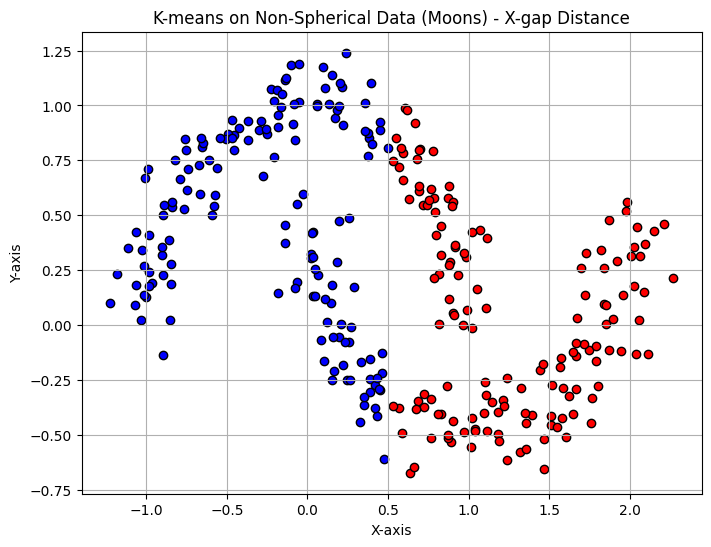

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='blue', marker='o', edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='o', edgecolor='k')
plt.title('K-means on Non-Spherical Data (Moons) - X-gap Distance')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## y값의 차이

151 149


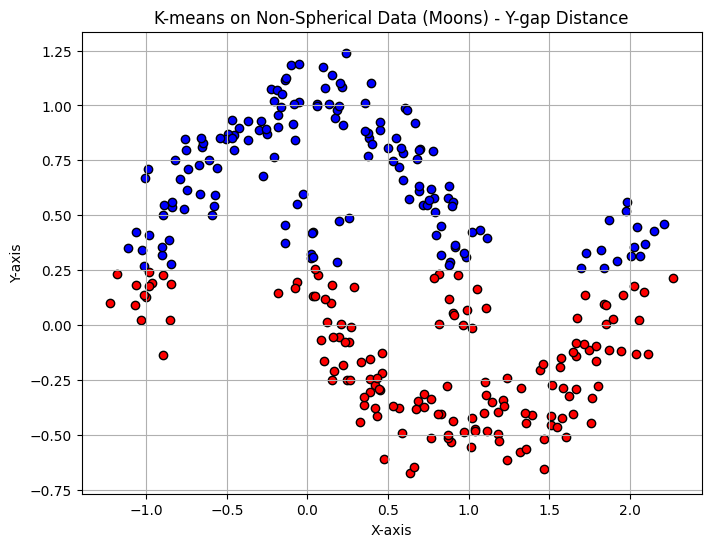

In [95]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric

user_function = lambda point1, point2: abs(point1[1] - point2[1])
metric = distance_metric(type_metric.USER_DEFINED, func=user_function)

# create K-Means algorithm with specific distance metric
start_centers = [[0, 1], [1, 0]];
kmeans_instance = kmeans(X_moons, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

X1 = X_moons[clusters[0]]
X2 = X_moons[clusters[1]]

print(len(X1), len(X2))

plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='blue', marker='o', edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], c='red', marker='o', edgecolor='k')
plt.title('K-means on Non-Spherical Data (Moons) - Y-gap Distance')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()